[Τετάρτη 9:08 μ.μ.] ΠΑΥΛΟΠΟΥΛΟΣ ΙΩΑΝΝΗΣ;PAVLOPOULOS IOANNIS
HW7: Draw and submit a plot (with informative labels and title only) of the interquartile range for all the posts in the Greeklish2Greek dataset, sorted based on the median edit distance per post, and by ignoring self-distance in your computations.

In [5]:
import pandas as pd
import os


DATA_DIR = "data"
translation_df = pd.read_csv(os.path.join(DATA_DIR, "greeklish_translations.csv"), 
                           encoding="utf-8", 
                           index_col=0)
translation_df

,f3662208,f3662212,f3662213,f3662216,f3662210,f3662207
0,Ολυμπιακός-Παο,Ολυμπιακός-ΠΑΟ,Ολυμπιακός-Π.Α.Ο,Ολυμπιακός-Παο,Ολυμπιακός-Παναθηναϊκός,Ολυμπιακός-ΠΑΟ
1,Ναι το ξέρω,Ναι το ξέρω,Ναι το ξέρω,Ναι το ξέρω,Ναι το ξέρω,Ναι το ξέρω
2,Άλλη ερώτηση,Άλλη ερώτηση,Άλλη ερώτηση,Άλλη ερώτηση,Άλλη ερώτηση,Άλλη ερώτηση
3,Μπορώ να παίξω τώρα,Μπορώ να παίξω τώρα,Μπορώ να παίξω τώρα,Μπορώ να παίξω τώρα,Μπορώ να παίξω τώρα,Μπορώ να παίξω τώρα
4,Στείλε,Στείλε,Στείλε,Στείλε,Στείλε,Στείλε
...,...,...,...,...,...,...
122,Αωωωωωωω ???,"Αωωωωωωω,","Ωωωωωωωωωω,","Αωωωωωωω, ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚...",Ωωωωωωωω,Awwwwwww
123,Ναι για πλάκα το έστειλα,Ναι για πλάκα το έστειλα,Ναι για πλάκα το έστειλα,Ναι για πλάκα το έστειλα,Ναι για πλάκα το έστειλα,Ναι για πλάκα το έστειλα
124,Ναι,Ναι,Ναι,Ναι,Ναι,Ναι
125,Καληνύχτα,Καληνύχτα,Καληνύχτα,Καληνύχτα,Καληνύχτα,Καληνύχτα


In [37]:
from itertools import combinations
import numpy as np
import Levenshtein


results = []

annotators = list(translation_df.keys())
for i in range(translation_df.shape[0]):
    edit_distances = []
    for annot1, annot2 in combinations(annotators, 2):
        translation1 = translation_df.loc[i, annot1]
        translation2 = translation_df.loc[i, annot2]
        edit_distances.append(Levenshtein.distance(translation1, translation2))
    
    results.append(np.median(edit_distances))

In [64]:
translation_df["median_dist"] = results
translation_df = translation_df.sort_values(by="median_dist", ascending=False)
translation_df

,f3662208,f3662212,f3662213,f3662216,f3662210,f3662207,median_dist
122,Αωωωωωωω ???,"Αωωωωωωω,","Ωωωωωωωωωω,","Αωωωωωωω, ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚ù§Ô∏è‚...",Ωωωωωωωω,Awwwwwww,9.0
9,10-Ιούνη (Ιουνίου),10-Ιουνίου,2023-06-10 00:00:00,10 Ιουνίου,10 Ιουνίου,10-Ιουνίου,8.0
36,Κομπλέ απλά δεν έβλεπα γι' αυτό,Κομπλέ απλά δεν έβλεπα γι αυτό,Κομπλέ απλά δεν έβλεπα γι' αυτό,Κομπλέ απλά δεν έβλεπα γι΄ αυτό,Κομπλέ απλά δεν έβλεπα για αύριο,Comple απλά δεν έβλεπα για αύριο,5.0
11,Πότε (Ποτέ),Πότε,Πότε/ Ποτέ,Πότε,Πότε/Ποτέ,Ποτε,5.0
65,26000 μ(έτρα),26000 μ,26000 metre,26000 μ,26000 m,26000 m,4.0
...,...,...,...,...,...,...,...
41,Ωραία,Ωραία,Ωραία,Ωραία,Ωραία,Ωραία,0.0
40,Έγινε,Έγινε,Έγινε,Έγινε,Έγινε,Έγινε,0.0
39,Άντε,Άντε,Άντε,Άντε,Άντε,Άντε,0.0
38,Χαίρομαι,Χαίρομαι,Χαίρομαι,Χαίρομαι,Χαίρομαι,Χαίρομαι,0.0


In [82]:
[3]*2

[3, 3]

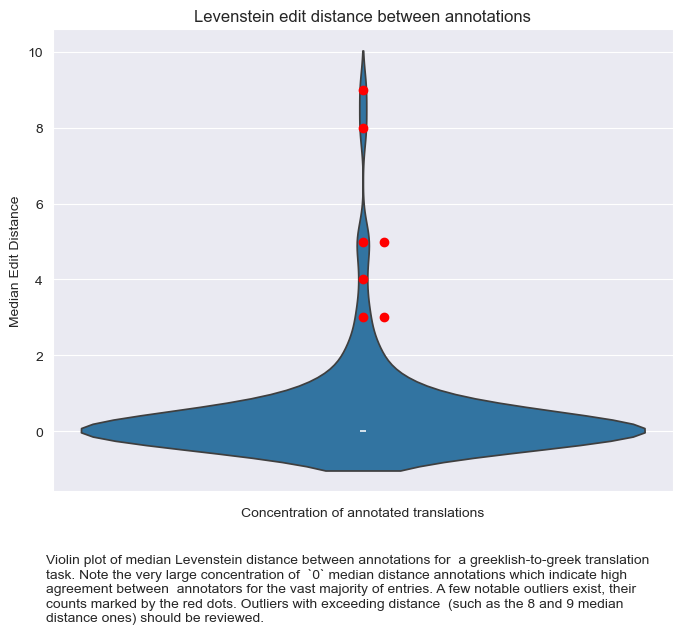

In [110]:
import matplotlib.pyplot as plt
import textwrap
import seaborn as sns


sns.set_style("darkgrid")
sns.violinplot(translation_df.median_dist)

for dist in range(3,10):
    count = np.sum(translation_df.median_dist == dist)
    plt.scatter(y=[dist]*count, x=np.linspace(-0.0, 0.03, count), color="red")

caption = """Violin plot of median Levenstein distance between annotations for 
a greeklish-to-greek translation task. Note the very large concentration of 
`0` median distance annotations which indicate high agreement between 
annotators for the vast majority of entries. A few notable outliers exist,
their counts marked by the red dots. Outliers with exceeding distance 
(such as the 8 and 9 median distance ones) should be reviewed.
"""

plt.text(-0.45, -5, textwrap.fill(caption, width=100))
plt.ylabel("Median Edit Distance")
plt.xlabel("Concentration of annotated translations")
plt.title("Levenstein edit distance between annotations")
 
plt.gcf().set_size_inches(8, 6)
plt.savefig("edit_dist.png",  bbox_inches="tight")
plt.show()